# <u>Financial data analysis and risk management</u>


### <u>1) Libraries import</u>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

### <u>2) Historical data download</u>
<b>data source:</b> Yahoo finance <br>
<b>granularity:</b> 1 day time period <br>
<b>start date:</b> 2017-01-01<br> 
<b>end date:</b> 2020-10-05<br>
<b>tickers:</b> BTC-USD, ETH-USD, LTC-USD

In [2]:
tickers = ['BTC-USD','ETH-USD', 'LTC-USD', 'XRP-USD']
#tickers = ['SPY', 'AAPL']

data_1d = yf.download(tickers, start="2017-01-01", end="2020-10-05", group_by="ticker" ,interval = "1d")

[*********************100%***********************]  4 of 4 completed


### <u>3) Data visualization</u>

In [3]:
for ticker in tickers:
    fig = go.Figure(data=[go.Candlestick(x=data_1d.index,
                    open=data_1d[ticker]['Open'],
                    high=data_1d[ticker]['High'],
                    low=data_1d[ticker]['Low'],
                    close=data_1d[ticker]['Close'])])

    fig.update_layout(xaxis_rangeslider_visible=False, title=ticker, xaxis_title='Date',yaxis_title='Price')
    fig.show()

### <u>4) Daily peformance chart</u>

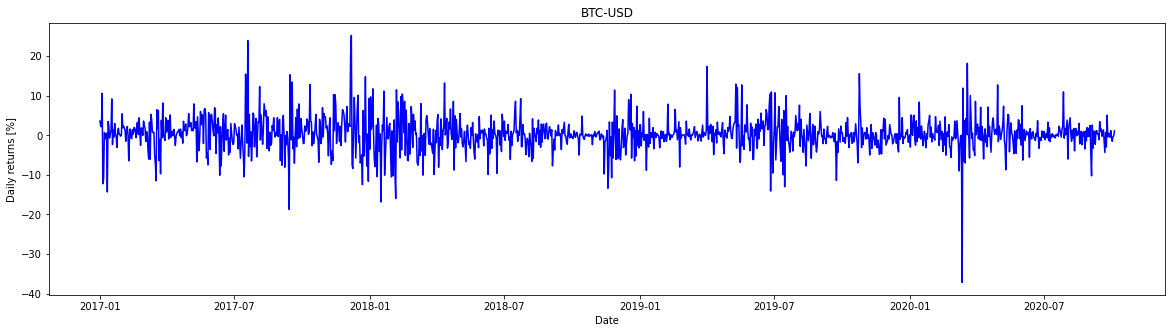

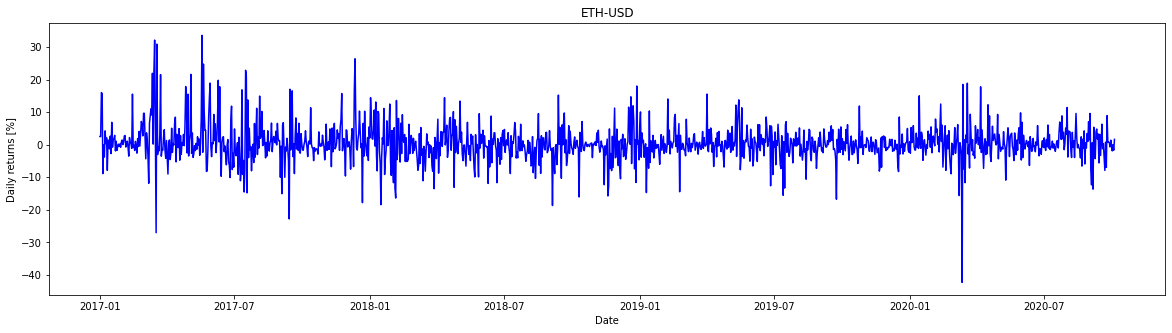

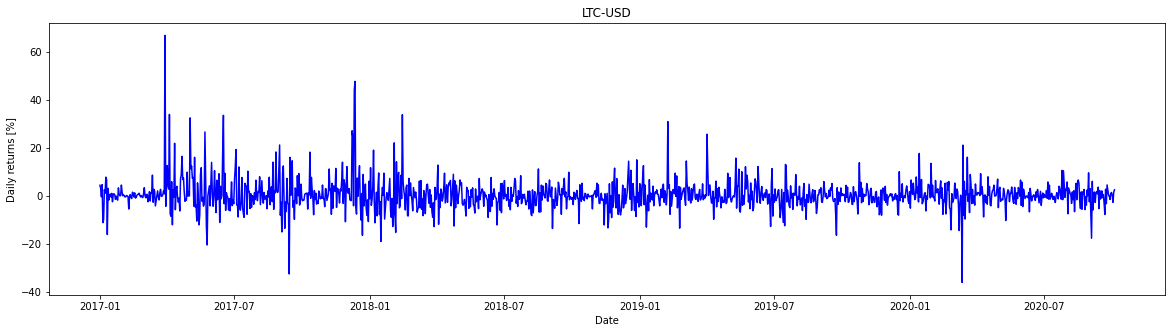

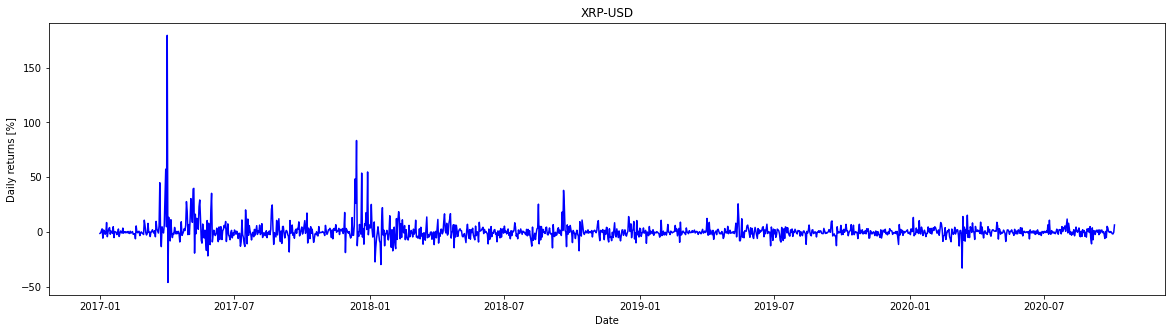

In [4]:
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 

for ticker in tickers:
    data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values *100
    
for ticker in tickers:
    plt.figure(figsize=(20,5))
    plt.plot(data_1d_pct[ticker], 'b');
    plt.xlabel('Date');
    plt.ylabel('Daily returns [%]');
    plt.title(ticker);    

### <u>5) Scatter chart</u>
This chart shows returns dependency between BTC-USD and ETH-USD

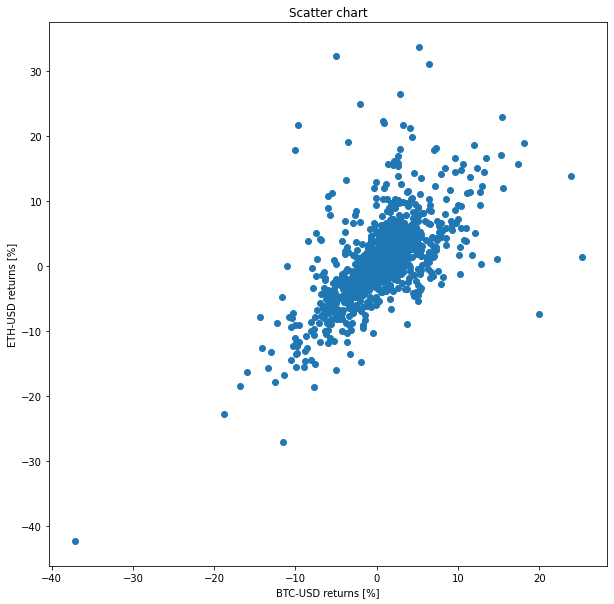

In [5]:
x = data_1d_pct.iloc[1:,0]
y = data_1d_pct.iloc[1:,1]

plt.figure(figsize=(10,10))

plt.scatter(data_1d_pct.iloc[1:,0], data_1d_pct.iloc[1:,1]);
plt.xlabel(str(data_1d_pct.columns[0]) + str(' returns [%]'));
plt.ylabel(str(data_1d_pct.columns[1]) + str(' returns [%]'));
plt.title('Scatter chart');    


### <u>6) Correlation heatmap</u>
This heatmap shows correlation matrix for all downloaded cryptocurrencies 

In [6]:
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 

for ticker in tickers:
    data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values *100

data_1d_pct_corr = data_1d_pct.dropna()
data_1d_corr = data_1d_pct_corr.corr()

fig = go.Figure(data=go.Heatmap(
                   z=data_1d_corr,
                   x=data_1d_corr.columns,
                   y=data_1d_corr.index,
                   colorscale = 'Viridis'))
fig.show()

### <u> 7) Rolling correlation chart</u>
This chart shows rolling correlation with 30 days period.

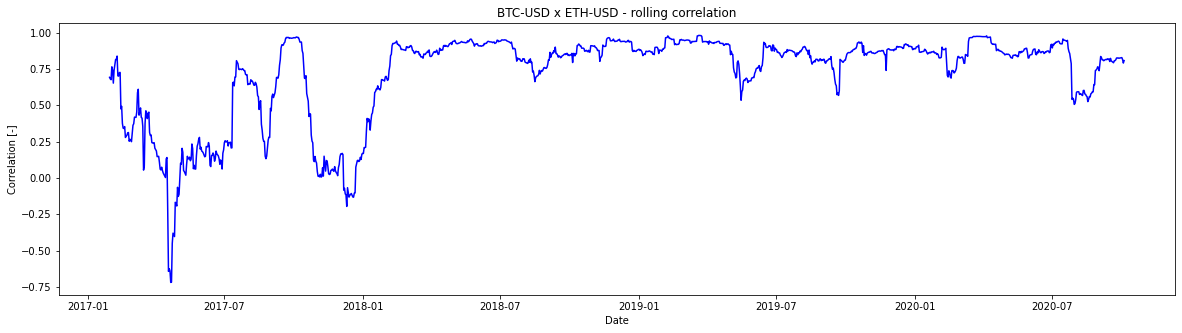

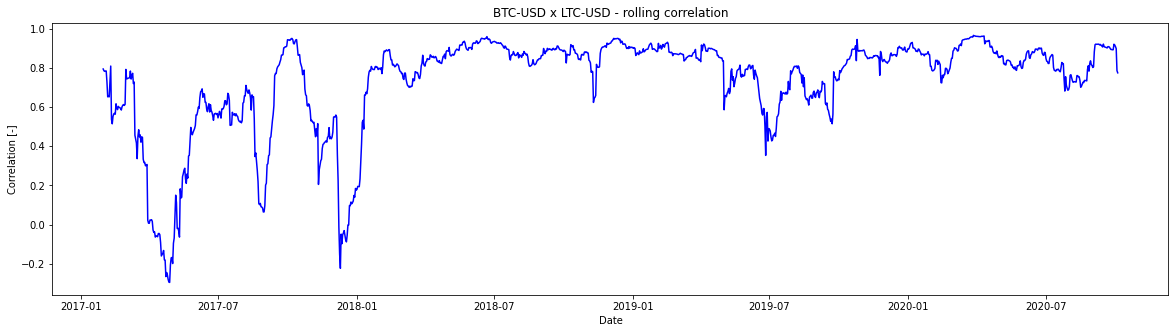

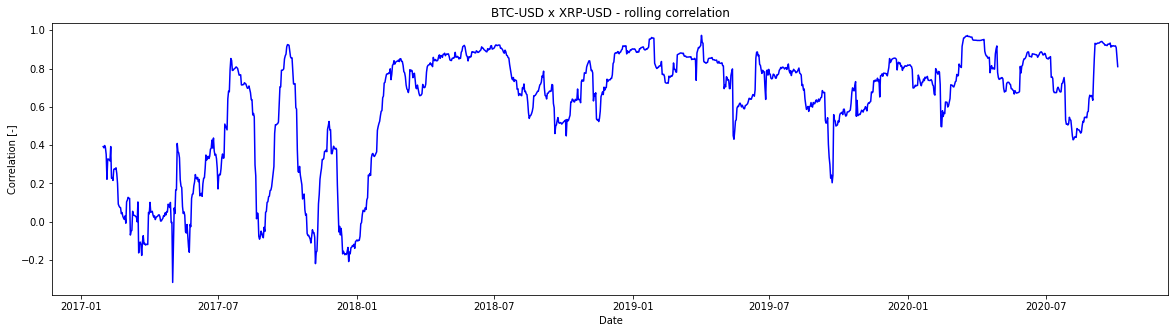

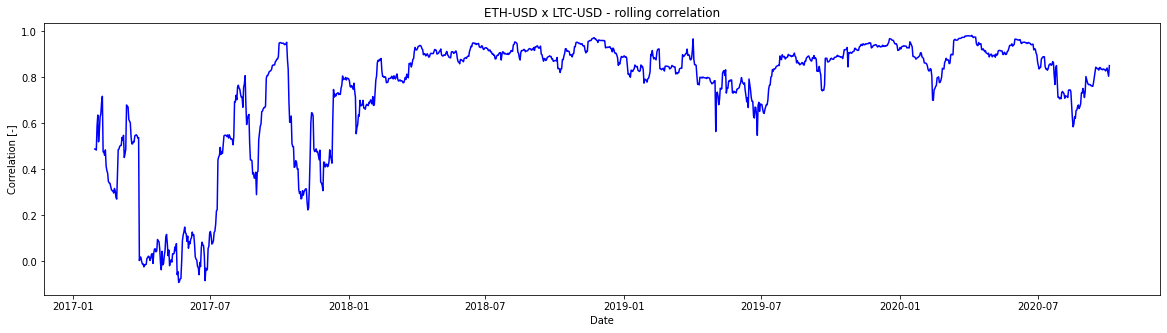

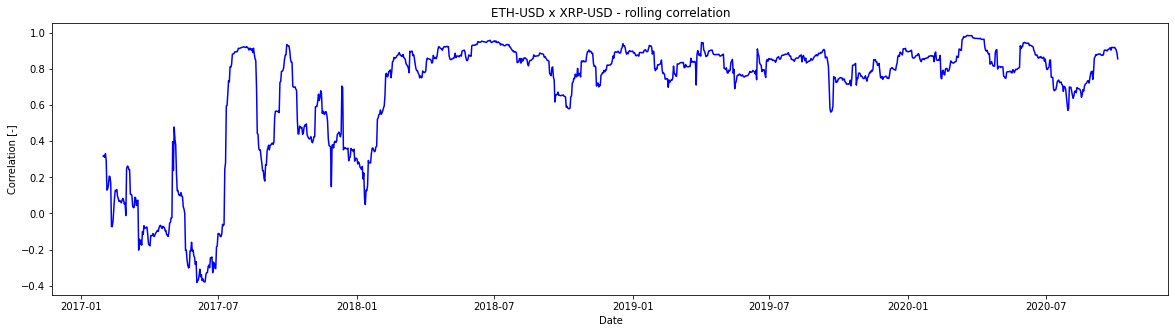

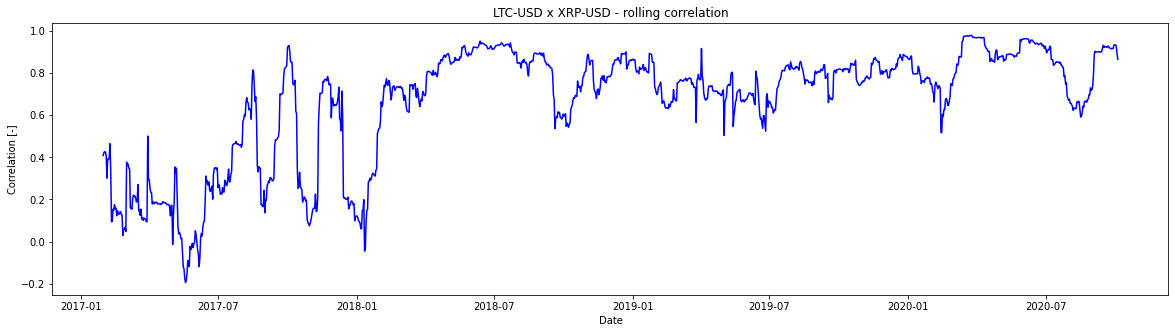

In [7]:
data_1d_rollingcorr = pd.DataFrame(index=data_1d.index, columns = tickers) 
done = np.array([])
for ticker in tickers:
    for tic in tickers:
        done = np.append(done, [tic+ticker])
        if ticker != tic and (ticker+tic) not in done:
            rollcorr = data_1d_pct[tic].rolling(30).corr(data_1d_pct[ticker])
            plt.figure(figsize=(20,5))
            plt.plot(rollcorr, 'b');
            plt.xlabel('Date');
            plt.ylabel('Correlation [-]');
            plt.title(str(ticker) + str(" x ") + str(tic) + str(" - rolling correlation"));     
            


### <u>8) Autocorrelation heatmap</u>
This chart shows autocorrelation for each cryptocurrency with 1 to 5 day lags.

In [8]:
data_1d_autocorr = pd.DataFrame(index=['Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5'], columns = tickers) 

for ticker in tickers:
    for idx, lag in zip(data_1d_autocorr.index, range(1, len(data_1d_autocorr)+1)):
        data_1d_autocorr.xs(idx)[ticker] = data_1d_pct[ticker].autocorr(lag=lag)

fig = go.Figure(data=go.Heatmap(
                   z=data_1d_autocorr,
                   x=data_1d_autocorr.columns,
                   y=data_1d_autocorr.index,
                   colorscale = 'Viridis'))
fig.show()

data_1d_autocorr

BTC-USD    ETH-USD     LTC-USD     XRP-USD
Day_1   -0.0275624 -0.0115475  0.00382978 -0.00839718
Day_2    0.0398641  0.0654798   0.0194778    0.181936
Day_3  0.000141413  0.0344318   0.0190755   0.0571624
Day_4  -0.00846807  0.0479456   0.0531301   0.0167834
Day_5     0.032648  0.0493917  0.00560103   0.0447264

### <u>9) Value at risk</u>
<b>method:</b> Historical <br>
<b>assets:</b> single asset (BTC-USD)<br>
<b>granularily:</b> 1 day time period<br>
<b>initial capital:</b> 100k $<br>
<b>start date:</b> 2017-01-01<br>
<b>end date:</b> 2020-10-05<br>
<b>VAR prediction:</b> 1 day<br>
<b>Confidence:</b> 0.01 - 0.2

[*********************100%***********************]  1 of 1 completed


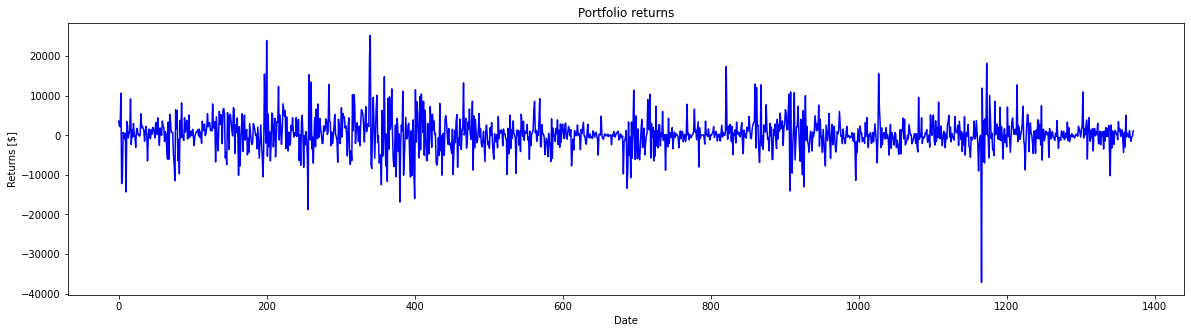

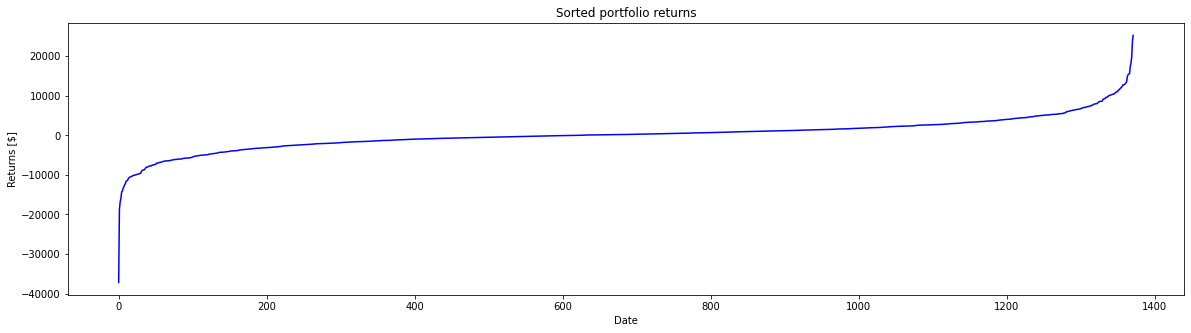

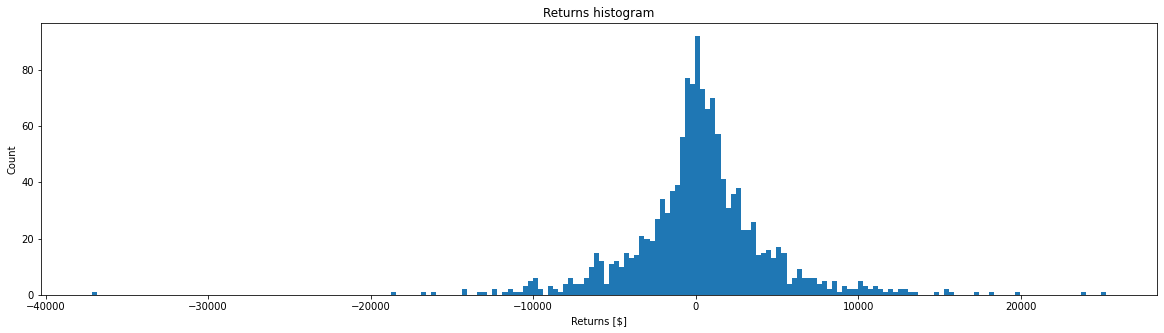

With 0.8% confidence you wan't lose more than -2098.79
With 0.81% confidence you wan't lose more than -2258.24
With 0.82% confidence you wan't lose more than -2415.29
With 0.83% confidence you wan't lose more than -2571.4
With 0.84% confidence you wan't lose more than -2808.94
With 0.85% confidence you wan't lose more than -3055.3
With 0.86% confidence you wan't lose more than -3246.93
With 0.87% confidence you wan't lose more than -3453.97
With 0.88% confidence you wan't lose more than -3705.23
With 0.89% confidence you wan't lose more than -4051.01
With 0.9% confidence you wan't lose more than -4336.35
With 0.91% confidence you wan't lose more than -4737.64
With 0.92% confidence you wan't lose more than -5127.73
With 0.93% confidence you wan't lose more than -5725.32
With 0.94% confidence you wan't lose more than -6010.43
With 0.95% confidence you wan't lose more than -6410.13
With 0.96% confidence you wan't lose more than -6975.95
With 0.97% confidence you wan't lose more than -7935

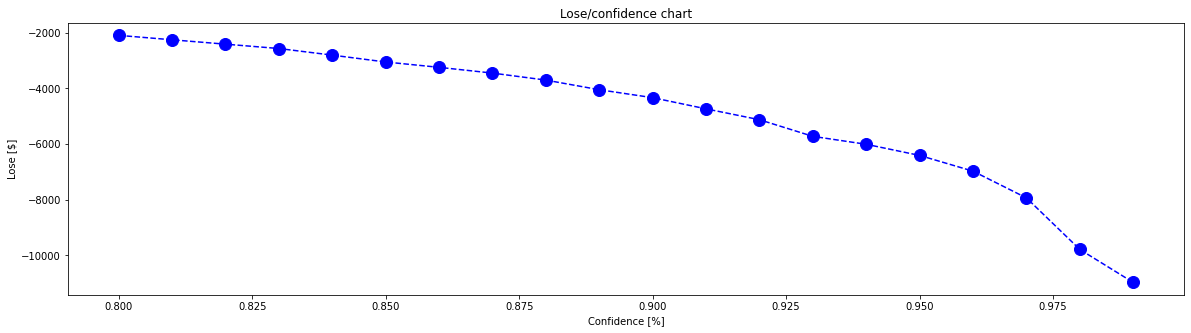

In [9]:
ticker=['BTC-USD']

data_1d = yf.download(ticker, start="2017-01-01", end="2020-10-05", group_by="ticker" ,interval = "1d")
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = ticker) 
conf_lose = pd.DataFrame(columns = ['confidence','lose']) 

initial_capital = 100000

pct_range = np.arange(0.8, 1, 0.01)

days = len(data_1d_pct)

data_1d_pct= data_1d['Close'].pct_change().values

hist_perf = data_1d_pct[1:] * initial_capital

hist_perf_sum_sorted = np.sort(hist_perf) 

plt.figure(figsize=(20,5))
plt.plot(hist_perf, 'b');
plt.xlabel('Date');
plt.ylabel('Returns [$]');
plt.title('Portfolio returns');    
plt.show()

plt.figure(figsize=(20,5))
plt.plot(hist_perf_sum_sorted, 'b');
plt.xlabel('Date');
plt.ylabel('Returns [$]');
plt.title('Sorted portfolio returns');  
plt.show()

plt.figure(figsize=(20,5))
plt.hist(hist_perf_sum_sorted, bins=200);
plt.xlabel('Returns [$]');
plt.ylabel('Count');
plt.title('Returns histogram');  
plt.show()

for pct in pct_range:
    lose = round(hist_perf_sum_sorted[int(round(days*(1-round(pct,2)), 0))-1],2)
    conf_lose = conf_lose.append({'confidence': pct, 'lose' : lose}, ignore_index=True)
    print (str('With ') +str(round(pct,2)) +str('% confidence you wan\'t lose more than ')+ str(lose) )
    
plt.figure(figsize=(20,5))
plt.plot(conf_lose['confidence'], conf_lose['lose'],'bo--', markersize=12)
plt.xlabel('Confidence [%]');
plt.ylabel('Lose [$]');
plt.title('Lose/confidence chart');  
plt.show()

### <u>10) Rolling Value at Risk </u>
<b>method:</b> Historical<br>
<b>assets:</b> portfolio (BTC-USD, ETH-USD, LTC-USD)<br>
<b>portfolio weights:</b> 0.33, 0.33, 0.34<br>
<b>granularily:</b> 1 day time period<br>
<b>initial capital:</b> 100k $<br>
<b>start date:</b> 2019-01-01<br>
<b>end date:</b> 2020-10-05<br>
<b>VAR prediction:</b> 1 day<br>
<b>Confidence:</b> 0.05<br>
<b>Out-of-sample period:</b>  30%<br>  
<b>Description:</b> The chart shows value of portfolio(blue line) and Value at Risk(red line) calculated each day with anchored dataset. Value at Risk is simulated on 30% out of sample dataset.

[*********************100%***********************]  3 of 3 completed


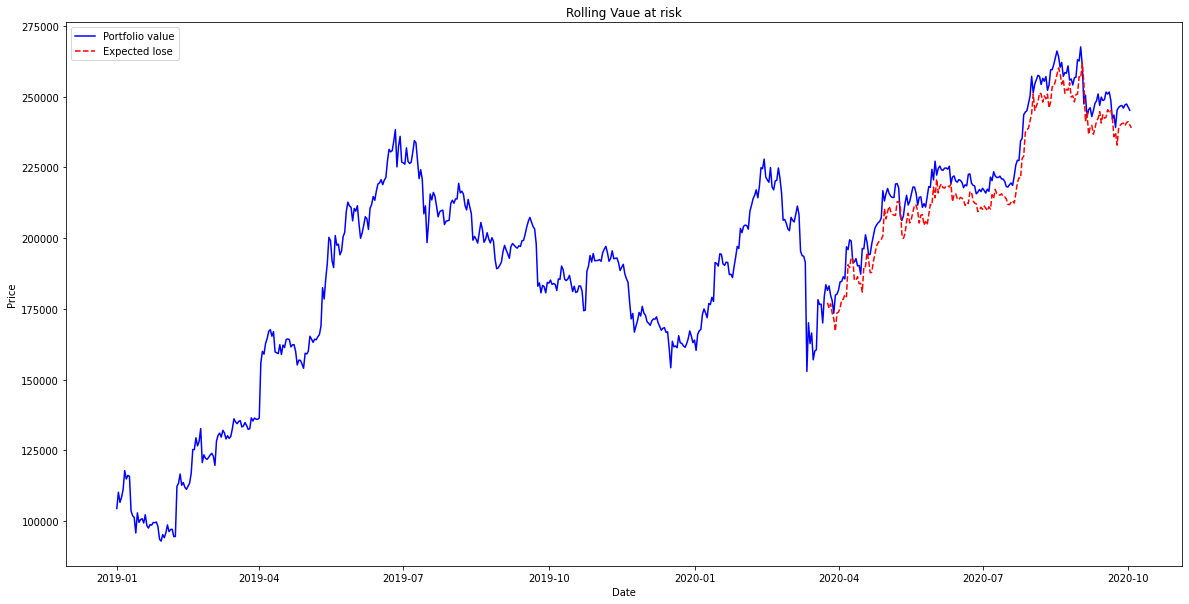

In [10]:
tickers = ['BTC-USD','ETH-USD','LTC-USD']
data_1d = yf.download(tickers, start="2019-01-01", end="2020-10-05", group_by="ticker" ,interval = "1d")
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 

expected_lose = pd.DataFrame(index=data_1d.index, columns = ['lose', 'lose_price'])

initial_capital = 100000
weights = [0.33, 0.33, 0.34]
out_of_sample = 0.3
pct = 0.95

time_back = int(round(len(data_1d_pct)*out_of_sample,0))

for ticker in tickers:
    data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values

for i in range(len(data_1d_pct)-time_back, len(data_1d_pct)-1):
    hist_perf = data_1d_pct[1:i] * initial_capital * weights
    hist_perf_sum = hist_perf.iloc[:,0] + hist_perf.iloc[:,1] + hist_perf.iloc[:,2]    
    hist_perf_sum_sorted = hist_perf_sum.sort_values(ascending=True)
    lose = round(hist_perf_sum_sorted[int(round(i*(1-pct), 0))-1],2)
    expected_lose.iloc[i,0] = lose
    expected_lose.iloc[i,1] = hist_perf_sum.cumsum()[-1] + lose  + initial_capital
    
expected_lose['price'] = hist_perf_sum.cumsum() + initial_capital

plt.figure(figsize=(20,10))
plt.plot(expected_lose['price'], 'b');
plt.plot(expected_lose['lose_price'], 'r--');
plt.xlabel('Date');
plt.ylabel('Price');
plt.title('Rolling Vaue at risk');
plt.legend(['Portfolio value','Expected lose']);

### <u>11) Portfolio simulation</u>

<b>method:</b> Bootstrap<br>
<b>assets:</b> portfolio (BTC-USD, ETH-USD)<br>
<b>portfolio weights:</b> 0.5, 0.5<br>
<b>granularily:</b> 1 day time period<br>
<b>start date:</b> 2017-01-01<br>
<b>end date:</b> 2020-10-05<br>
<b>Simulation sample:</b> 50 days<br>
<b># of simulated portfolios:</b> 50<br>


In [11]:
tickers = ['BTC-USD','ETH-USD']

data_1d = yf.download(tickers, start="2017-01-01", end="2020-10-05", group_by="ticker" ,interval = "1d")

data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 
portfolio_simulations = pd.DataFrame() 

portfolio_weight = [0.5, 0.5]

for ticker in tickers:
    data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values
    
data_1d_pct = data_1d_pct.dropna()

for i in range (0, 50):
    sim_returns = data_1d_pct.sample(n = 100,replace = True).reset_index(drop = True)
    result = sim_returns * portfolio_weight
    result = result.sum(axis=1)
    portfolio_simulations[str('Portfolio_')+str(i)] = result
    
portfolio_simulations = portfolio_simulations.cumsum()  
last_values = portfolio_simulations.iloc[-1,:]
print(str('\n\nNumber of portfolio simulation with positive performance: ') + str(sum(n > 0 for n in last_values)))    
    
  
fig = px.line(portfolio_simulations, x=portfolio_simulations.index, y=portfolio_simulations.columns)
fig.update_layout(title="Portfolio simulation", xaxis_title='Day',yaxis_title='Cummulative performance [%]')
fig.show()



[*********************100%***********************]  2 of 2 completed


Number of portfolio simulation with positive performance: 38


### <u>12) Portolio simulation - scenario test</u>
<b>method:</b> Bootstrap<br>
<b>assets:</b> portfolio (BTC-USD, ETH-USD)<br>
<b>portfolio weights:</b> 0.5, 0.5<br>
<b>granularily:</b> 1 day time period<br>
<b>start date:</b> 2017-01-01<br>
<b>end date:</b> 2020-10-05<br>
<b>Simulation sample:</b> 50 days<br>
<b># of simulated portfolios:</b> 50<br>

<b>Scenario:</b> What can happen with portfolio performance, if each profitable day will be 20% lower and each losing day will be 20% bigger.

In [12]:
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 
portfolio_simulations = pd.DataFrame() 

portfolio_weight = [0.5, 0.5]

for ticker in tickers:
    data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values
    
data_1d_pct = data_1d_pct.dropna()

for ticker in tickers:
    data_1d_pct.loc[data_1d_pct[ticker] > 0] *= 0.8
    data_1d_pct.loc[data_1d_pct[ticker] < 0] *= 1.2

#portfolio simulations
for i in range (0, 50):
    sim_returns = data_1d_pct.sample(n = 100,replace = True).reset_index(drop = True)
    result = sim_returns * portfolio_weight 
    result = result.sum(axis=1)
    portfolio_simulations[str('Portfolio_')+str(i)] = result


portfolio_simulations = portfolio_simulations.cumsum()    
last_values = portfolio_simulations.iloc[-1,:]
print(str('\n\nNumber of portfolio simulation with positive performance: ') + str(sum(n > 0 for n in last_values)))    

fig = px.line(portfolio_simulations, x=portfolio_simulations.index, y=portfolio_simulations.columns)
fig.show()



Number of portfolio simulation with positive performance: 4


### <u>13) Portfolio simulations - scenario test combinations</u>
<b>method:</b> Bootstrap<br>
<b>assets:</b> portfolio (BTC-USD, ETH-USD)<br>
<b>portfolio weights:</b> 0.5, 0.5<br>
<b>granularily:</b> 1 day time period<br>
<b>start date:</b> 2017-01-01<br>
<b>end date:</b> 2020-10-05<br>
<b>Simulation sample:</b> 50 days<br>
<b># of simulated portfolios:</b> 50<br>

<b>Scenario combinations:</b> What can happen with portfolio performance, if each profitable day will be in interval from 50% to 150% of historical value and each losing day will be in interval from 50% to 150% of historical value.

In [13]:
data_1d_pct = pd.DataFrame(index=data_1d.index, columns = tickers) 
portfolio_simulations = pd.DataFrame() 

portfolio_weight = [0.5, 0.5]

data_1d_pct = data_1d_pct.dropna()

lose_change = np.round(np.arange(0.5, 1.5, 0.01),2)
profit_change = np.round(np.arange(0.5, 1.5, 0.01),2)

from tqdm import tqdm

portfolio_simulation = pd.DataFrame(index = profit_change, columns = lose_change)

for n in tqdm(profit_change):
    for m in lose_change:
        for ticker in tickers:
            data_1d_pct[ticker]= data_1d[ticker]['Close'].pct_change().values
        
        for ticker in tickers:
            data_1d_pct.loc[data_1d_pct[ticker] > 0] *= n
            data_1d_pct.loc[data_1d_pct[ticker] < 0] *= m

        for i in range (0, 50):
            sim_returns = data_1d_pct.sample(n = 100,replace = True).reset_index(drop = True)
            result = sim_returns * portfolio_weight
            result = result.sum(axis=1)
            portfolio_simulations[str('Portfolio_')+str(i)] = result
        
        portfolio_simulations = portfolio_simulations.cumsum()    
        last_values = portfolio_simulations.iloc[-1,:]      
        portfolio_simulation.xs(n)[m] = float(sum(z > 0 for z in last_values))

fig = go.Figure(data=[go.Surface(z=portfolio_simulation.values, x=portfolio_simulation.index, y=portfolio_simulation.columns)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Portfolio simulation', autosize=True,
                  width=800, height=600,
                  margin=dict(l=0, r=0, b=0, t=30),
                  scene = dict(
                    xaxis_title='Negative returns change',
                    yaxis_title='Positive returns change',
                    zaxis_title='# of profitable portfolio simulation'))
fig.show()

100%|██████████| 100/100 [23:18<00:00, 13.99s/it]
